In [3]:
import os
os.environ['PYDEVD_DISABLE_FILE_VALIDATION'] = '1'
import pandas as pd
import numpy as np
import loompy as lp
#import crick
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import h5py
import tdigest
from tdigest import TDigest
import pickle

/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:67: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/loompy/bus_file.py:101: NumbaDepr

In [1]:
print("heyyo efvfcvrst!")

heyyo efvfcvrst!


# 1. Checking the original CSV

## head, shape and subset printing

In [3]:
df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

rows = df.shape[0]
columns = df.shape[1] 
print(f"rows = {rows}")
print(f"columns = {columns}")
print()

print("columns:")
print(df.columns[:17])

df.head()

subset = df.iloc[:3, 0:17]
print(subset)

rows = 32906
columns = 23630

columns:
Index(['pert_id', 'pert_name', 'target', 'moa', 'canonical_smiles',
       'inchi_key', 'compound_aliases', 'sig_count', 'sig_id', 'pert_iname',
       'pert_type', 'cell_id', 'pert_idose', 'pert_itime', 'distil_id', 'cid',
       'A1BG'],
      dtype='object')
         pert_id pert_name target                   moa  \
0  BRD-K60230970    MG-132  PSMB1  Proteasome inhibitor   
1  BRD-K60230970    MG-132  PSMB1  Proteasome inhibitor   
2  BRD-K60230970    MG-132  PSMB1  Proteasome inhibitor   

                                    canonical_smiles  \
0  CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...   
1  CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...   
2  CC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(...   

                     inchi_key compound_aliases  sig_count  \
0  TZYWCYJVHRLUCT-VABKMULXSA-N                -       8360   
1  TZYWCYJVHRLUCT-VABKMULXSA-N                -       8360   
2  TZYWCYJVHRLUCT-VABKMULXSA-N                -    

## Checking unique values of cols

In [5]:
df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

columns = df.columns[:17]

# Count
columns_unique = df[columns].nunique()
# The nunique() function in pandas is used to count the number of unique values in a pandas Series or DataFrame. 

# Create a file to save the output
output_file = "1_nunique.txt"
with open(output_file, "w") as file:
    for name, count in columns_unique.items():
        output = f"{name}: {count} unique values"
        file.write(output + "\n")

## Printing idose and itime values

In [7]:
df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

selected_column_dose = df["pert_idose"]
# Get unique row values in the column
unique_dose = selected_column_dose.unique()

selected_column_time = df["pert_itime"]
unique_time = selected_column_time.unique()

# Create a new TXT file and write unique values
print(f"Unique idose: {unique_dose}")
print()
print(f"Unique time: {unique_time}")

Unique idose: ['20.0 um' '10.0 um' '3.33 um' '1.11 um' '0.37 um' '0.12 um' '0.04 um'
 '1.0 um' '1.5 um' '2.0 um' '0.5 um' '25.0 um' '9.58 um' '3.19 um'
 '1.06 um' '0.35 um' '5.0 um' '3.0 um' '0.33 um' '0.11 um' '0.01 um'
 '0.0 um' '11.2 um' '3.73 um' '1.24 um' '0.41 um' '0.14 um' '0.05 um'
 '11.55 um' '3.85 um' '1.28 um' '0.43 um' '4.17 um' '1.39 um' '0.46 um'
 '0.15 um' '0.02 um' '5.77 um' '1.92 um' '0.64 um' '0.21 um' '0.07 um'
 '0.67 um' '0.22 um' '4.8 um' '1.6 um' '0.53 um' '0.18 um' '0.06 um'
 '8.11 um' '2.7 um' '0.9 um' '0.3 um' '0.1 um' '0.03 um' '6.79 um'
 '2.26 um' '0.75 um' '0.25 um' '0.08 um' '10.05 um' '3.35 um' '1.12 um'
 '10.72 um' '3.57 um' '1.19 um' '0.4 um' '0.13 um' '4.52 um' '1.51 um'
 '0.17 um' '10.07 um' '3.36 um']

Unique time: ['24 h' '6 h' '3 h']


## Saving pert_name in a txt file

In [4]:
df = pd.read_csv('3_sorted_dataset.csv', usecols=range(3))

# Get unique values from the 'rct' column
unique_values = df['pert_id'].unique()

# Save the unique values to a txt file
with open('total_pert_id_MCF7.txt', 'w') as f:
    for value in unique_values:
        f.write(str(value) + '\n')


## Pert id and name differences

In [8]:
df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

unique_values_x = df['pert_id'].unique()

# Filter the DataFrame based on unique values in column 'x'
filtered_df = df[df['pert_id'].isin(unique_values_x)]

# Select only columns 'x' and 'y' from the filtered DataFrame
filtered_df = filtered_df[['pert_id', 'pert_iname']]

# Print the resulting DataFrame
filtered_df.to_csv('2.csv', index=False)

## Number of zeros and NaNs in the dataset

In [9]:
df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

total_cells = df.size

# Count the number of cells with zero
zero_cells = np.count_nonzero(df == 0)

# Count the number of cells with NaN values
nan_cells = df.isnull().sum().sum()

# Print the counts
print("Total number of cells:", total_cells)
print("Number of cells with zero:", zero_cells)
print("Number of cells with NaN values:", nan_cells)

Total number of cells: 777568780
Number of cells with zero: 126152686
Number of cells with NaN values: 0


## Checking for duplicate cols (genes) and rows (samples)

In [2]:
# The next one is memory efficient

df = pd.read_pickle('MCF7_SMILES_siginfo_32906x23630_08312023.pkl')

# Check for duplicate columns
duplicate_cols = df.columns[df.T.duplicated()].tolist()
duplicate_cols_indices = [df.columns.get_loc(col) for col in duplicate_cols]

# Check for duplicate rows
duplicate_rows = df[df.duplicated()].index.tolist()

# Write the results to a text file
with open('3_duplicates.txt', 'w') as file:
    file.write('duplicate columns (genes):\n')
    file.write(', '.join(duplicate_cols) + '\n')
    file.write(', '.join(map(int, duplicate_cols_indices)) + '\n')
    file.write(f'len: {len(duplicate_cols)}\n\n')
    
    file.write('duplicate rows (samples):\n')
    file.write(', '.join([f'row{i}' for i in duplicate_rows]) + '\n')
    file.write(', '.join(map(str, duplicate_rows)) + '\n')
    file.write(f'len: {len(duplicate_rows)}')

NameError: name 'pd' is not defined

In [4]:
# Memory efficient

df = pd.read_pickle('MCF7_SMILES_siginfo_32906x23630_08312023.pkl')

# Check for duplicate columns using hashing
seen_hashes = set()
duplicate_cols = []
for col in df.columns:
    col_hash = pd.util.hash_pandas_object(df[col], index=False).sum()
    if col_hash in seen_hashes:
        duplicate_cols.append(col)
    else:
        seen_hashes.add(col_hash)

duplicate_cols_indices = [df.columns.get_loc(col) for col in duplicate_cols]

# Check for duplicate rows
duplicate_rows = df[df.duplicated()].index.tolist()

# Write the results to a text file
with open('3_duplicates.txt', 'w') as file:
    file.write("It night show you the ZERO ones, too!")
    file.write('duplicate columns (genes):\n')
    file.write(', '.join(duplicate_cols) + '\n')
    file.write(', '.join(map(str, duplicate_cols_indices)) + '\n')
    file.write(f'len: {len(duplicate_cols)}\n\n')
    
    file.write('duplicate rows (samples):\n')
    file.write(', '.join([f'row{i}' for i in duplicate_rows]) + '\n')
    file.write(', '.join(map(str, duplicate_rows)) + '\n')
    file.write(f'len: {len(duplicate_rows)}')


## Finding specific cols (based on col name) -- if neccessary

In [6]:
df = pd.read_pickle('MCF7_SMILES_siginfo_32906x23630_08312023.pkl')

unique_values_count = df["AC005795.1"].nunique()
unique_values_count0 = df["AC007283.4"].nunique()

print(f"Number of unique values in column 'AC005795.1': {unique_values_count}")
print(f"Number of unique values in column 'AC007283.4': {unique_values_count0}" + "\n")
print(df["AC005795.1"])
print(df["AC007283.4"])

Number of unique values in column 'AC005795.1': 1
Number of unique values in column 'AC007283.4': 1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32901    0.0
32902    0.0
32903    0.0
32904    0.0
32905    0.0
Name: AC005795.1, Length: 32906, dtype: float64
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32901    0.0
32902    0.0
32903    0.0
32904    0.0
32905    0.0
Name: AC007283.4, Length: 32906, dtype: float64


## Histogram of genes (cols) with one unique value

In [ ]:
# Code is written in second part (cell)

## Checking for string values in cols(genes)

In [4]:
# The next code is more memory-efficient

df = pd.read_pickle('MCF7_SMILES_siginfo_32906x23630_08312023.pkl')


# Extract the gene expression values from columns 23 onwards
gene_expression_data = df.iloc[:, 16:].replace([np.nan, np.inf, -np.inf], -1).values.T.tolist()

#gene_expression_data = gene_expression_data.astype(float)

# Iterate through the list and print the string values
for row in gene_expression_data:
    for value in row:
        if isinstance(value, str):
            print(value)

: 

In [4]:
# Memory efficient 

df = pd.read_pickle('MCF7_SMILES_siginfo_32906x23630_08312023.pkl')

def process_chunk(df_chunk):
    strings_found = []
    gene_expression_data = df_chunk.iloc[:, 16:].replace([np.nan, np.inf, -np.inf], -1)
    for _, row in gene_expression_data.iterrows():
        for value in row:
            if isinstance(value, str):
                strings_found.append(value)
    return strings_found

chunk_size = 5000
strings_list = []
for i in range(0, len(df), chunk_size):
    df_chunk = df.iloc[i:i+chunk_size]
    strings_list.extend(process_chunk(df_chunk))

# Print the found strings
for value in strings_list:
    print(value)


## Getting loc of a string col

In [ ]:
df = pd.read_csv('5_sorted_head.csv')

# Find the index of the column "cpd"
cpd_index = df.columns.get_loc("cid")

print(cpd_index)

## Indices of columns of interest

In [ ]:
# Not neccessary

df = pd.read_csv("5_sorted_head.csv", engine="python")

column_names = ['pert_iname', 'pert_idose', 'pert_itime']
# Get the indices of the columns
column_indices = [df.columns.get_loc(col_name) for col_name in column_names]

print(column_indices)

# Sorting dataset for replicates

## pkl to csv (sorting operation) (only if input is pkl)

In [5]:
# Execute as a py file separately

df = pd.read_pickle("MCF7_SMILES_siginfo_32906x23630_08312023.pkl")

df['pert_idose'] = df['pert_idose'].str.replace(' um', '').astype('float64')
df['pert_itime'] = df['pert_itime'].str.replace(' h', '').astype('float64')

# Sort the dataset by multiple columns
sorted_df = df.sort_values(by=['pert_name', 'pert_idose', 'pert_itime'])

# Reset the index with a new column
sorted_df.reset_index(drop=True, inplace=True)

# Save the sorted data to a new CSV file
sorted_df.to_csv('3_sorted_dataset.csv', index=False)

KeyboardInterrupt: 

## Sorting original csv file

In [ ]:
df = pd.read_csv("original.csv")

df['pert_idose'] = df['pert_idose'].str.replace(' um', '').astype('float64')
df['pert_itime'] = df['pert_itime'].str.replace(' h', '').astype('float64')

# Sort the dataset by multiple columns
sorted_df = df.sort_values(by=['pert_id', 'pert_idose', 'pert_itime'])

# Reset the index with a new column
sorted_df.reset_index(drop=True, inplace=True)

# Save the sorted data to a new CSV file
sorted_df.to_csv('3_sorted_dataset.csv', index=False)

## Printing dataset characteristics & Subset creation

In [3]:
df = pd.read_csv("3_sorted_dataset.csv")

num_rows = df.shape[0]
num_columns = df.shape[1]

print("columns:")
print(df.columns[:16])
print()
subset = df.iloc[:3, 0:16]
print(subset)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

first_200_rows = df.head(300)
first_200_rows.to_csv('4_sorted_head.csv', index=False)

columns:
Index(['pert_id', 'pert_name', 'target', 'moa', 'canonical_smiles',
       'inchi_key', 'compound_aliases', 'sig_count', 'sig_id', 'pert_iname',
       'pert_type', 'cell_id', 'pert_idose', 'pert_itime', 'distil_id', 'cid'],
      dtype='object')

         pert_id pert_name target            moa  \
0  BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
1  BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
2  BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   

                      canonical_smiles                    inchi_key  \
0  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12  GYBXAGDWMCJZJK-UHFFFAOYSA-N   
1  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12  GYBXAGDWMCJZJK-UHFFFAOYSA-N   
2  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12  GYBXAGDWMCJZJK-UHFFFAOYSA-N   

  compound_aliases  sig_count                 sig_id pert_iname pert_type  \
0                -        184  REP.A007_MCF7_24H:N18    10-DEBC    trt_cp   
1                -        184  REP.A007_MCF7_24H:N18    10-DEBC    trt_cp   
2                -

## 978 landmark genes check difference

In [4]:
with open('978_L1000.txt', 'r') as txt_file:
    txt_lines = txt_file.readlines()

# Extract values from the second column
txt_column_2 = [line.split()[1] for line in txt_lines]
#print(txt_column_2)

df = pd.read_csv('4_sorted_head.csv')
csv_column_names = df.columns[16:]

# Compare the names from the txt file with the csv column names
overlap_names = set(csv_column_names) & set(txt_column_2)

non_overlap_names = set(csv_column_names) - overlap_names
#non_overlap_l1000 = [elem for elem in set(txt_column_2) if elem not in set(csv_column_names)]
not_overlap = set(txt_column_2) - overlap_names

print("Number of overlapping names:", len(overlap_names))
print("Number of non-overlapping names:", len(non_overlap_names) + "\n")
#print(non_overlap_names)
print("L1000 genes not in the dataset:")
print(not_overlap)

Number of overlapping names: 971
Number of non-overlapping names: 22643
{'RCHY1', 'HNRNPA3P10', 'MC4R', 'IGKV2-24', 'CCT7P1', 'RP11-874G11.1', 'XXBAC-BPG246D15.9', 'ATP5O', 'AC240274.1', 'ZSCAN22', 'RHOBTB2', 'AP3D1', 'AIDA', 'APOPT1', 'RPL19P21', 'SPATA6L', 'RP5-935K16.2', 'FOXO1', 'SHANK2', 'IGKV1D-13', 'GPR155', 'NUP205', 'AHNAK2', 'TCAP', 'LIMK1', 'ZNF358', 'CYP4F3', 'ZNF787', 'POTEM', 'RP11-885L14.1', 'CCDC172', 'FAM98A', 'LRRTM2', 'MIS18BP1', 'AGFG1', 'RP5-1187M17.10', 'NAXE', 'MRPS27', 'C9ORF114', 'SPRED3', 'RPL18AP7', 'ZBTB41', 'NBPF15', 'COL4A5', 'HIC1', 'RP11-641D5.1', 'EIF2S2', 'TNRC6C', 'PHEX', 'KRT18P28', 'FXYD3', 'RP11-294C11.2', 'TLX3', 'ZNF140', 'VIPR1', 'FOXS1', 'RP11-690I21.3', 'RP4-728D4.3', 'FAM3D', 'RPN2', 'EIF2AK1', 'PAQR5', 'RP11-124D2.7', 'GALNTL6', 'STIM2', 'RP4-701O16.5', 'CD151', 'RS1', 'IGHV3-43', 'KCNJ16', 'SDHC', 'RPL23AP30', 'HHAT', 'KRT6B', 'SEPT7', 'GLRX3P2', 'NEDD8-MDP1', 'LRP4', 'CHCHD4P5', 'DDX11L1', 'TMEM150A', 'EIF5B', 'C1ORF116', 'PTGER1', 'XIAP',

## Indices of replicates

In [ ]:
import csv

# Initialize variables
current_val = None
indices = []
output_lines = []

# Open the CSV file for reading
with open("3_sorted_dataset.csv", "r") as csv_file:
    csv_reader = csv.DictReader(csv_file)  # Create a CSV reader

    for index, row in enumerate(csv_reader):
        pert_iname = row["pert_iname"]
        pert_idose = float(row["pert_idose"])
        pert_itime = float(row["pert_itime"])

        if (pert_iname, pert_idose, pert_itime) == current_val:
            indices.append(str(index))  # Convert index to string and append
        else:
            if current_val is not None:
                output_lines.append(",".join(indices))

            current_val = (pert_iname, pert_idose, pert_itime)
            indices = [str(index)]

    if indices:
        output_lines.append(",".join(indices))

# Write the output to a file
with open('5_sorted_indices.txt', 'w') as file:
    for line in output_lines:
        file.write(f"{line}\n")
    
    num_lines = sum(1 for line in file)

print("Number of replicates:", num_lines)

### Replicates in MCF7: ###

In [ ]:
import csv

# Initialize variables
current_val = None
indices = []
output_lines = []

# Open the CSV file for reading
with open("3_sorted_dataset.csv", "r") as csv_file:
    csv_reader = csv.DictReader(csv_file)  # Create a CSV reader

    for index, row in enumerate(csv_reader):
        pert_iname = row["pert_iname"]
        pert_idose = float(row["pert_idose"])
        pert_itime = float(row["pert_itime"])

        if (pert_iname, pert_idose, pert_itime) == current_val:
            indices.append(str(index))  # Convert index to string and append
        else:
            if current_val is not None:
                output_lines.append(",".join(indices))

            current_val = (pert_iname, pert_idose, pert_itime)
            indices = [str(index)]

    if indices:
        output_lines.append(",".join(indices))

num_lines = 0
# Write the output to a file
with open('5_sorted_indices.txt', 'w') as file:
    for line in output_lines:
        file.write(f"{line}\n")
        num_lines += 1

print("Number of replicates:", num_lines)

### Replicates in MCF7: 10,926 ###


In [5]:
indices = []

with open('5_sorted_indices.txt', 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        line_list = line.split(',')  # Split the line into a list using comma as the delimiter
        line_list = [int(item) for item in line_list]
        indices.append(line_list)

print(indices)


[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14], [15, 16, 17], [18, 19, 20], [21, 22, 23], [24, 25, 26], [27, 28, 29], [30, 31, 32], [33, 34, 35], [36, 37, 38], [39, 40, 41], [42, 43, 44], [45, 46, 47], [48, 49, 50], [51, 52, 53], [54, 55, 56], [57, 58], [59, 60, 61], [62, 63], [64, 65, 66], [67, 68, 69], [70], [71], [72], [73], [74], [75], [76, 77], [78, 79], [80, 81], [82, 83], [84, 85], [86, 87], [88, 89], [90, 91], [92, 93], [94, 95], [96, 97], [98, 99], [100, 101, 102], [103, 104, 105], [106, 107, 108], [109, 110, 111], [112, 113, 114], [115, 116, 117], [118, 119, 120], [121, 122, 123], [124, 125], [126, 127, 128], [129, 130, 131], [132, 133, 134], [135, 136, 137, 138, 139], [140, 141, 142, 143], [144, 145, 146, 147, 148], [149, 150, 151, 152, 153], [154, 155, 156, 157, 158], [159, 160, 161, 162, 163], [164, 165, 166, 167, 168], [169, 170, 171, 172], [173, 174, 175, 176, 177], [178, 179, 180], [181, 182, 183, 184], [185, 186, 187, 188, 189], [190, 191, 192], [193, 194,

## Checking max and second-max in replicates

In [3]:
# Read the text file and split lines by commas
with open("5_sorted_indices.txt", "r") as file:
    lines = file.readlines()

# Convert the text values to integers
data = [[int(num) for num in line.strip().split(",")] for line in lines]

# Find the maximum count of numbers in a row
max_count = max(len(row) for row in data)

# Calculate the lengths of each row
row_lengths = [len(row) for row in data]
# Sort the row_lengths in descending order
row_lengths.sort(reverse=True)
second_max = row_lengths[1]
third_max = row_lengths[2]
print("Maximum count of numbers in a replicate:", max_count)
print(f"Second max count of numbers in a replicate: {second_max}")
print(f"Third max count of numbers in a replicate: {third_max}")


Maximum count of numbers in a replicate: 937
Second max count of numbers in a replicate: 936
Third max count of numbers in a replicate: 11


### Getting description of max and second-max

In [ ]:
# Next code is more efficient!

max_count = 0
max_indices = []

with open("5_sorted_indices.txt", "r") as f:
    for line in f:
        numbers = list(map(int, line.strip().split(',')))
        if len(numbers) > max_count:
            max_count = len(numbers)
            max_indices = numbers

# Read the csv file using pandas
df = pd.read_csv("3_sorted_dataset.csv")

# Use the indices to get the rows and the first 15 columns
selected_rows = df.iloc[max_indices, :16]

# Save the result to a txt file
with open("6_max_replicate_des.txt", "w") as f:
    # Write the header
    f.write("indice, " + ', '.join(selected_rows.columns) + "\n")

    for index, row in selected_rows.iterrows():
        f.write(str(index) + ", " + ', '.join(map(str, row)) + "\n")


In [ ]:
# More efficient one

import pandas as pd
import numpy as np

# Initialize a list to store the length of numbers in each line and the numbers themselves
lines_data = []

with open("5_sorted_indices.txt", "r") as f:
    for line in f:
        numbers = list(map(int, line.strip().split(',')))
        lines_data.append((len(numbers), numbers))

# Sort the list by the length of numbers
sorted_data = sorted(lines_data, key=lambda x: x[0])

# Get the second max line's numbers
max_indices = sorted_data[-1][1]
second_max_indices = sorted_data[-2][1]

# Read the csv file using pandas
df = pd.read_csv("3_sorted_dataset.csv")

# Use the indices to get the rows and the first 15 columns
selected_rows_max = df.iloc[max_indices, :16]
selected_rows_second = df.iloc[second_max_indices, :16]

# Save the result to a txt file
with open("6_max_replicate_des.txt", "w") as f:
    # Write the header
    f.write("indice, " + ', '.join(selected_rows_max.columns) + "\n")

    for index, row in selected_rows_max.iterrows():
        f.write(str(index) + ", " + ', '.join(map(str, row)) + "\n")
 
        
with open("7_second_max_replicate_des.txt", "w") as f:
    # Write the header
    f.write("indice, " + ', '.join(selected_rows_second.columns) + "\n")

    for index, row in selected_rows_second.iterrows():
        f.write(str(index) + ", " + ', '.join(map(str, row)) + "\n")


### Sorting the max replicate with sig_id (Not neccessary)

In [ ]:
input_file = '3_sorted_dataset.csv'
output_file = '8.5_replicate.csv'

# The row indices to select
start_row = 21378
end_row = 22016

# Read specific rows from the CSV file into a DataFrame
df_selected_rows = pd.read_csv(input_file, skiprows=range(1, start_row), nrows=(end_row - start_row + 1))

unique_count = df_selected_rows['sig_id'].nunique()

print(f"The number of unique values in the 'sig_id' column is {unique_count}.")


### Changing the indices file based on the new criterion

In [ ]:
import pandas as pd

# Load the text file and determine the lines with the max and second max number of indices
with open('5_sorted_indices.txt', 'r') as f:
    lines = [list(map(int, line.strip().split(','))) for line in f]

# Find positions of max and second max lines
max_pos = lines.index(sorted(lines, key=len, reverse=True)[0])
second_max_pos = lines.index(sorted(lines, key=len, reverse=True)[1])

# Load your dataset
df = pd.read_csv('3_sorted_dataset.csv')

def get_grouped_indices(indices):
    selected_rows = df.iloc[indices].sort_values(by='sig_id')
    grouped = selected_rows.groupby('sig_id').apply(lambda group: group.index.tolist()).tolist()
    return grouped

# Replace the max and second max lines with their new lines in the original positions
lines[max_pos:max_pos+1] = get_grouped_indices(lines[max_pos])
lines[second_max_pos:second_max_pos+1] = get_grouped_indices(lines[second_max_pos])

# Write the updated lines to a new text file
with open('8_modified_indices.txt', 'w') as f:
    for line in lines:
        f.write(','.join(map(str, line)) + '\n')


In [1]:
with open('8_modified_indices.txt', 'r') as file:
    lines = file.readlines()
    print(f"New number of replicates: {len(lines)}")


New number of replicates: 11596


# Pearson Correlation

## small PC test

In [9]:
df = pd.read_csv("4_sorted_head.csv")

# Select the columns of interest (from column 23 onwards)
gene_columns = df.columns[16:]

#replicates = df.loc[:4, gene_columns].apply(pd.to_numeric, errors='coerce')
df1 = df.loc[:3,gene_columns].apply(pd.to_numeric, errors='coerce').dropna(axis=1)

pairwise_correlation = np.corrcoef(df1, rowvar=True)
print(pairwise_correlation)

[[1.         0.95416178 0.95039981 0.96202385]
 [0.95416178 1.         0.99443162 0.99257783]
 [0.95039981 0.99443162 1.         0.99375478]
 [0.96202385 0.99257783 0.99375478 1.        ]]


## Medium PC test

In [8]:
# NOT Necessary

df = pd.read_csv("4_sorted_head.csv")

# Select the columns of interest (from column 23 onwards)
gene_columns = df.columns[16:]
df1 = df.loc[:, gene_columns].apply(pd.to_numeric, errors='coerce')

def pairwise(vector):
    for i in range(len(vector) - 1):
        for j in range(i+1, len(vector)):
            # Get the two rows for comparison
            row1 = df1.loc[vector[i], gene_columns].astype(float)
            row2 = df1.loc[vector[j], gene_columns].astype(float)

            # Drop columns with NaN values from both rows
            non_nan_columns = row1.notna() & row2.notna()
            row1_dropped = row1[non_nan_columns]
            row2_dropped = row2[non_nan_columns]

            # Compute the correlation coefficient for the non-NaN values
            correlation = round(np.corrcoef(row1_dropped, row2_dropped)[0, 1], 3)

            # Store the correlation coefficient in the matrix
            pairwise_correlation[vector[j], vector[i]] = correlation
            
# Initialize an empty correlation matrix
pairwise_correlation = np.full((15, 15), 33.00)

indices = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
        
for elem in indices:
    pairwise(elem)

# Save the correlation matrix to a file
np.savetxt('9_test_pairwise.csv', pairwise_correlation, delimiter=',')

## Pairwise Pearson CORR operation

In [ ]:
import pandas as pd
import numpy as np
import h5py

def pairwise(vector, matrix, chunk_df):
    for i in range(len(vector) - 1):
        for j in range(i + 1, len(vector)):
            row1 = chunk_df.loc[vector[i], :]
            row2 = chunk_df.loc[vector[j], :]
            non_nan_columns = row1.notna() & row2.notna()
            row1_dropped = row1[non_nan_columns]
            row2_dropped = row2[non_nan_columns]
            correlation = round(np.corrcoef(row1_dropped, row2_dropped)[0, 1], 3)
            matrix[vector[j], vector[i]] = correlation

indices = []
with open('8_modified_indices.txt', 'r') as file:
    for line in file:
        line = line.strip()
        line_list = line.split(',')
        line_list = [int(item) for item in line_list]
        indices.append(line_list)

chunksize = 3000
pairwise_correlation = np.zeros((32906, 32906))
prev_chunk_df = None

# Read the CSV file chunk-by-chunk
for start_idx in range(0, 32906, chunksize):
    chunk = pd.read_csv("3_sorted_dataset.csv", skiprows=range(1, start_idx + 1), nrows=chunksize)
    actual_rows = chunk.shape[0]  # Get the actual number of rows in the chunk
    end_idx = start_idx + actual_rows - 1  # Adjust the end index based on the actual number of rows
    
    gene_columns = chunk.columns[16:]
    chunk_df = chunk.loc[:, gene_columns].apply(pd.to_numeric, errors='coerce')
    chunk_df.index = range(start_idx, end_idx + 1)  # Set the index based on the actual number of rows

    
    # Combine with previous chunk if it exists
    if prev_chunk_df is not None:
        combined_df = pd.concat([prev_chunk_df, chunk_df])
    else:
        combined_df = chunk_df

    # Find the groups that overlap with this chunk's index range
    relevant_indices = [grp for grp in indices if any(start_idx <= x <= end_idx for x in grp)]
    
    for elem in relevant_indices:
        if all(x in combined_df.index for x in elem):
            pairwise(elem, pairwise_correlation, combined_df)
    
    prev_chunk_df = chunk_df

# Save the resulting matrix
with h5py.File('10_pairwise_correlation.h5', 'w') as hf:
    hf.create_dataset('pairwise_correlation', data=pairwise_correlation)

## test h5 file

In [3]:
with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    pairwise_correlation = hf['pairwise_correlation'][:8,:8]

print(pairwise_correlation.shape[0])
print()
print(pairwise_correlation)

8

[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.954 0.    0.    0.    0.    0.    0.    0.   ]
 [0.95  0.994 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.975 0.    0.    0.    0.   ]
 [0.    0.    0.    0.995 0.964 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.967 0.   ]]


# Assessing PC h5 file

## Checking values in matrix rows and cols

In [6]:
with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    dataset = hf['pairwise_correlation'][:8,:8]

index = 0
    
# Count the number of non-zero values in the selected row
row_i = dataset[index, :]
col_i = dataset[:, index]


count_row = np.count_nonzero(row_i)
count_column = np.count_nonzero(col_i)


# Count the number of values under 0.85 in row i
num_values_under_085_row = np.count_nonzero((row_i < 0.951) & (row_i != 0))
num_values_under_085_col = np.count_nonzero((col_i < 0.951) & (col_i != 0))

#print(f"Length: {len(num_values)}")
print("Row:")
print(f"Non-zero in row {index}: {count_row}")
print(f"Non-zero in column {index}: {count_column}")
print()

print(f"Under threshold in row: {num_values_under_085_row}")
print(f"Under threshold in column: {num_values_under_085_col}")

Row:
Non-zero in row 0: 0
Non-zero in column 0: 2

Under threshold in row: 0
Under threshold in column: 1


In [ ]:
# Not neccessary

with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    dataset = hf['pairwise_correlation'][:]

index = 0
    
# Count the number of non-zero values in the selected row
row_i = dataset[index, :]
col_i = dataset[:, index]


selected_values = []

for i, j in zip(row_i, col_i):
    # Check if both values are non-zero and less than 0.99
    if i != 0 and i < 0.99:
        selected_values.append(i)
    if j != 0 and j < 0.99:
        selected_values.append(j)

count_under_085 = sum(1 for value in selected_values if value < 0.95)

print(f"All values in row {index}: {len(selected_values)}")
print(f"Values under threshold: {count_under_085}")

## Double checking the PC value in csv (two rows)

In [ ]:
# Also for comparison, you can check "small PC test" section (upper)

In [10]:
df = pd.read_csv("4_sorted_head.csv")

# Select the columns of interest (from column 23 onwards)
gene_columns = df.columns[16:]
df1 = df.loc[:, gene_columns].apply(pd.to_numeric, errors='coerce')


row1 = df1.loc[3, gene_columns].astype(float)
row2 = df1.loc[4, gene_columns].astype(float)


non_nan_columns = row1.notna() & row2.notna()
row1_dropped = row1[non_nan_columns]
row2_dropped = row2[non_nan_columns]


mean_row1 = row1_dropped.mean()
mean_row2 = row2_dropped.mean()


row1_minus_mean = row1_dropped - mean_row1
row2_minus_mean = row2_dropped - mean_row2

sum_of_products_deviations = (row1_minus_mean * row2_minus_mean).sum()

std_row1 = row1_dropped.std()
std_row2 = row2_dropped.std()

PC0 = sum_of_products_deviations / (std_row1 * std_row2) 
PC = PC0 / len(row2_dropped)
    
print(f"PC between Row 1 and Row 2: {PC}")

PC between Row 1 and Row 2: 0.974883472809246


## Histogram of pairwise PC 

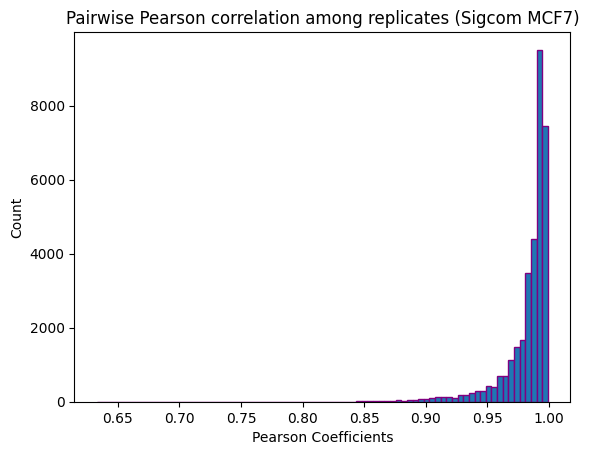

In [12]:
with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    pairwise_correlation = hf['pairwise_correlation'][:]

# Flatten the matrix into a 1D array
values = pairwise_correlation.flatten()

# Remove zeros from the array
non_zero_values = values[values != 0]

# Create a histogram of the non-zero values
plt.hist(non_zero_values, bins=80, ec="purple")
plt.xlabel('Pearson Coefficients')
plt.ylabel('Count')
plt.title('Pairwise Pearson correlation among replicates (Sigcom MCF7)')
plt.savefig('11_histogram_MCF7_before.png', dpi=400)
plt.show()

# H5 modification (indices)

## Adding indices to h5

In [ ]:
# Use the next one as it's memory efficient

with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    # Get the dataset (assuming your dataset is named 'correlation')
    dataset = hf['pairwise_correlation'][:]
    
    # Get the shape of the dataset
    num_rows, num_columns = dataset.shape
    
    # Create a new array containing the indices of the columns
    column_indices = np.arange(num_columns, dtype=int)
    
    # Append the new row to the matrix
    dataset_with_indices = np.vstack((dataset, column_indices))
    
# Save the updated matrix with indices to the h5 file
with h5py.File('12_pairwise_correlation_indices.h5', 'w') as hf:
    hf.create_dataset('pairwise_correlation', data=dataset_with_indices)


In [ ]:
# More efficient one
# Execute separately on the server

import numpy as np
import h5py

# First, let's determine the shape of the dataset without reading it all
with h5py.File('10_pairwise_correlation.h5', 'r') as hf:
    num_rows, num_columns = hf['pairwise_correlation'].shape

# Create a new array containing the indices of the columns
column_indices = np.arange(num_columns, dtype=int)

# Create a new h5 file for the dataset with indices
with h5py.File('12_pairwise_correlation_indices.h5', 'w') as hf_out:
    # We will add an additional row for the indices, hence num_rows + 1
    dset_out = hf_out.create_dataset('pairwise_correlation', (num_rows + 1, num_columns), dtype='float64', chunks=True)  # Assuming float64 dtype, adjust as necessary

    # Using chunks to read from the source file and write to the destination file
    chunk_size = 5000  # Adjust this value based on your available memory
    with h5py.File('10_pairwise_correlation.h5', 'r') as hf_in:
        for i in range(0, num_rows, chunk_size):
            end_idx = min(i + chunk_size, num_rows)  # Ensure we don't go beyond num_rows for the last chunk
            chunk_data = hf_in['pairwise_correlation'][i:end_idx, :]
            dset_out[i:end_idx, :] = chunk_data

    # After copying all chunks, append the column indices
    dset_out[-1, :] = column_indices


## How many values below threshold? & checking last line

In [ ]:
# Double check with histogram too!

In [6]:
count = 0

with h5py.File("14_clean_pc.h5", "r") as hf:
    dset = hf["pairwise_correlation"]
    last_row = dset[-1,:]
    rows, cols = dset.shape
    
    # Define chunk size (you may need to adjust this based on your memory)
    chunk_rows = 5000
    threshold = 0.85
    
    for start_row in range(0, rows, chunk_rows):
        end_row = min(rows, start_row + chunk_rows)
        
        # Read a chunk of data into memory
        chunk_data = dset[start_row:end_row, :]
        
        # Update the counter
        count += np.sum((chunk_data != 0) & (chunk_data < threshold))

print("last row of h5 file:")
print(last_row, "\n")
print(f"Number of non-zero values below 0.85: {count}")

last row of h5 file:
[0.0000e+00 1.0000e+00 2.0000e+00 ... 3.2903e+04 3.2904e+04 3.2905e+04] 

Number of non-zero values below 0.85: 23


# H5 below threshold cleaning

## 1. txt creation

In [ ]:
# Find them (the ones with the most num of correlations below the threshold), delete them. Step by step

In [7]:
with h5py.File('12_pairwise_correlation_indices.h5', 'r') as hf:
    dataset = hf['pairwise_correlation'][:]

selected_samples = []

def count(index, threshold, number):
    row_i = dataset[index, :]
    col_i = dataset[:, index]

    # Select non-zero values for row_i and col_i
    row_values = row_i[row_i != 0]
    col_values = col_i[col_i != 0]
    
    # Concatenate the selected non-zero values
    selected_values = np.concatenate([row_values, col_values])

    count_under_threshold = np.count_nonzero(selected_values < threshold)
    if count_under_threshold >= number:
        selected_samples.append(index)

for i in range(dataset.shape[0]-1):
    count(i, 0.85, 1)

print(len(selected_samples))
print(selected_samples)
np.savetxt("13.txt", selected_samples, fmt='%d')

#selected_samples = np.loadtxt("selected_samples.txt", dtype=int)

46
[1145, 1148, 3810, 3811, 4139, 4140, 4883, 4885, 6222, 6223, 8797, 8798, 8932, 8933, 9217, 9218, 13620, 13624, 13873, 13874, 15892, 15893, 16020, 16021, 16585, 16586, 18472, 18474, 18480, 18482, 18976, 18977, 19601, 19602, 21343, 21344, 23453, 23454, 23524, 23525, 27889, 27890, 29791, 29793, 30956, 30957]


## 2. removing samples in the matrix

In [ ]:
# Use the next code as it's more memory cosuming

# Step 1: Read the indices from the text file into a list
with open("13.txt", "r") as file:
    selected_samples = [int(line.strip()) for line in file]

# Step 2: Open the h5 file in read-write mode
with h5py.File("12_pairwise_correlation_indices.h5", "r") as hf:
    # Step 3: Remove the rows and columns from the dataset
    correlation_matrix = hf['pairwise_correlation'][:]
    filtered_correlation_matrix0 = np.delete(correlation_matrix, selected_samples, axis=0)
    filtered_correlation_matrix = np.delete(filtered_correlation_matrix0, selected_samples, axis=1)

with h5py.File('14_clean_pc.h5', 'w') as hf:
    hf.create_dataset('pairwise_correlation', data=filtered_correlation_matrix)

In [8]:
# memory-efficient code!

import numpy as np
import h5py

# Step 1: Read the indices from the text file into a list
with open("13.txt", "r") as file:
    selected_samples = sorted([int(line.strip()) for line in file])

chunk_size = 3000

with h5py.File("14_clean_pc.h5", "r") as hf_source, \
     h5py.File('15_clean_pc.h5', 'w') as hf_target:
    
    dset_source = hf_source['pairwise_correlation']
    
    # Create an empty target dataset, then populate it chunk by chunk
    target_shape = (
        dset_source.shape[0] - len(selected_samples),
        dset_source.shape[1] - len(selected_samples)
    )
    dset_target = hf_target.create_dataset(
        'pairwise_correlation',
        shape=(0, target_shape[1]), 
        maxshape=target_shape, 
        dtype=dset_source.dtype,
        chunks=True
    )
    
    for start_row in range(0, dset_source.shape[0], chunk_size):
        end_row = min(start_row + chunk_size, dset_source.shape[0])
        
        # Identify the indices in the chunk to delete
        indices_in_chunk = [idx for idx in selected_samples if start_row <= idx < end_row]
        adjusted_indices = [idx - start_row for idx in indices_in_chunk]
        
        chunk_data = dset_source[start_row:end_row, :]
        chunk_data_rows_removed = np.delete(chunk_data, adjusted_indices, axis=0)
        
        # Delete columns for the entire chunk data
        chunk_data_filtered = np.delete(chunk_data_rows_removed, selected_samples, axis=1)
        
        # Append to the target dataset
        dset_target.resize((dset_target.shape[0] + chunk_data_filtered.shape[0], target_shape[1]))
        dset_target[-chunk_data_filtered.shape[0]:, :] = chunk_data_filtered


## 3. Checkinf rows and cols of h5

In [2]:
with h5py.File('15_clean_pc.h5', 'r') as hf:
    correlation_matrix = hf['pairwise_correlation'][:]

print(correlation_matrix.shape)
print(correlation_matrix)

(32839, 32838)
[[0.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.5400e-01 0.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.5000e-01 9.9400e-01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 9.9600e-01 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 9.9800e-01 9.9600e-01 0.0000e+00]
 [0.0000e+00 1.0000e+00 2.0000e+00 ... 3.2903e+04 3.2904e+04 3.2905e+04]]


## 4. New Histogram

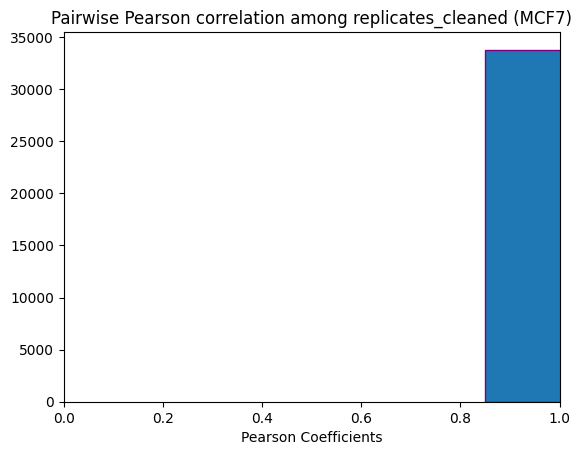

: 

In [3]:
with h5py.File('15_clean_pc.h5', 'r') as hf:
    pairwise_correlation = hf['pairwise_correlation'][:]

# Flatten the matrix into a 1D array
values = pairwise_correlation.flatten()

# Remove zeros from the array
non_zero_values = values[values != 0]

# Create a histogram of the non-zero values
plt.hist(non_zero_values, bins=100, ec="purple")
plt.xlim(0, 1)
plt.xlabel('Pearson Coefficients')
#plt.ylabel('Count')
plt.title('Pairwise Pearson correlation among replicates_cleaned (MCF7)')
plt.savefig('16_histogram_MCF7_cleaned.png', dpi=400)
plt.show()

# Cleaning original CSV file

## 1. Cleaning

In [ ]:
# Run separately on the server

import h5py
import numpy as np
import pandas as pd

with h5py.File('15_clean_pc.h5', 'r') as hf:
    
    # Assuming your dataset is named 'matrix', get the last row
    indices_to_keep = hf['pairwise_correlation'][-1,:]
    
df = pd.read_csv('3_sorted_dataset.csv')

# Filter the DataFrame to keep only the rows with the specified indices
filtered_df = df[df.index.isin(indices_to_keep)]

# Add a new column with the old indices
# filtered_df.insert(0, 'old_index', filtered_df.index)

# Reset the index of the DataFrame
filtered_df.reset_index(drop=True, inplace=True)

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('17_MCF7_clean.csv', index=False)

## 2. Checking rows and cols

In [ ]:
# Use the next code

df = pd.read_csv('17_MCF7_clean.csv')

print(df.shape)
#print(f"Number of rows in clean csv file: {len(df)}")

In [5]:
# A More memory-efficient code

import csv

def get_csv_shape(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        num_rows = sum(1 for _ in reader)
        f.seek(0)  # reset the file pointer to the beginning
        num_cols = len(next(reader))  # get the number of columns from the first row
    return num_rows, num_cols

filename = '17_MCF7_clean.csv'
num_rows, num_cols = get_csv_shape(filename)
print(f"Shape of CSV: ({num_rows}, {num_cols})")


Shape of CSV: (32839, 23630)


## 3. Making clean_head file

In [ ]:
# Use the next code

df = pd.read_csv('17_MCF7_clean.csv')
filtered_df = df.head(200)
filtered_df.to_csv('18_head_clean.csv', index=False)

In [7]:
# A more memory efficient code

import csv

input_filename = '17_MCF7_clean.csv'
output_filename = '18_head_clean.csv'
num_rows_to_extract = 200

with open(input_filename, 'r') as infile, open(output_filename, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for _ in range(num_rows_to_extract):
        try:
            writer.writerow(next(reader))
        except StopIteration:
            # Break out of loop if the CSV has fewer than 200 rows
            break


In [3]:
df = pd.read_csv('18_head_clean.csv')
print(df.head)

<bound method NDFrame.head of            pert_id pert_name target            moa  \
0    BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
1    BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
2    BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
3    BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
4    BRD-K70792160   10-DEBC   PIM1  Akt inhibitor   
..             ...       ...    ...            ...   
194  BRD-K40718343   AEE-788      -              -   
195  BRD-K40718343   AEE-788      -              -   
196  BRD-K40718343   AEE-788      -              -   
197  BRD-K40718343   AEE-788      -              -   
198  BRD-K40718343   AEE-788      -              -   

                                      canonical_smiles  \
0                  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12   
1                  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12   
2                  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12   
3                  CCN(CC)CCCCN1c2ccccc2Oc2ccc(Cl)cc12   
4                  CCN(CC)CCCCN

In [ ]:
# Not necessary
df = pd.read_csv('5_sorted_head.csv')
print(df["A4GNT"])
print(df["ATP5G2P3"])
print(df["HCRTR2"])

In [9]:
df = pd.read_csv('18_head_clean.csv')

# Extract the gene expression values from columns 23 onwards
gene_expression_df = df.iloc[:, 16:]

# Get the number of columns from 23 onward
num_columns_from_23 = gene_expression_df.shape[1]

# Get the unique gene names from column 23 onward
unique_gene_names = gene_expression_df.columns.unique()
num_unique_gene_names = len(unique_gene_names)

print(f"Number of columns from column 16 onward: {num_columns_from_23}")
print(f"Number of unique gene names: {num_unique_gene_names}")

Number of columns from column 16 onward: 23614
Number of unique gene names: 23614


## 4. Printing last 50 cols (genes)

In [10]:
df = pd.read_csv('18_head_clean.csv')
print(df.columns[-30:])

Index(['ZSCAN22', 'ZSCAN23', 'ZSCAN25', 'ZSCAN26', 'ZSCAN29', 'ZSCAN30',
       'ZSCAN31', 'ZSCAN32', 'ZSCAN4', 'ZSCAN5A', 'ZSCAN9', 'ZSWIM1', 'ZSWIM3',
       'ZSWIM4', 'ZSWIM5', 'ZSWIM6', 'ZSWIM7', 'ZSWIM8', 'ZUFSP', 'ZW10',
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object')


## 5. Getting loc of a specific col (gene)

In [4]:
df = pd.read_csv('18_head_clean.csv')

# Find the index of the column "cpd"
cpd_index = df.columns.get_loc("cid")

print(cpd_index)

15
